- What are the initial velocities?: restart with predefined velocities
- Why are the positions negative after first iteration (MIC?) ? yes looks like it (addition of cell length gives same result as fractional)

- Why jump the coordinates from step 0 to step 1 and back from 1 to 2?
velocities seem to be ok and step 2 agrees with step 2 from python

Is agreement between curves within numerical precision?

## NVE-MD

In [1]:
from profess_calculator import PROFESS
import profess_io as pio
from cpmd import initialize_atoms
from ase.md.verlet import VelocityVerlet
from ase import units
import os
# import pixiedust
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# initialize
pos_file = '/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/ion_step0.dat'
vel_file = '/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/vel_step0.dat'
cell_param = [[3.97, 0, 0], [0, 3.97, 0], [0, 0, 3.97]]
atoms = initialize_atoms(pos_file, vel_file, cell_param, pos_type='FRAC')

# set parameters for PROFESS calculation
run_dir = '/home/misa/git_repositories/PROFESS/test/ase_singlepoint'
inpt_name = 'sp'
pp_names = ['al_HC.lda.recpot']

In [5]:
# %%pixie_debugger
# remove old logfile
try:
    os.remove('/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_log')
except FileNotFoundError:
    print('Already deleted')
atoms.set_calculator(PROFESS(run_dir, inpt_name, pp_names, atoms))
# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 1*units.fs, logfile='/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_log_no_dens')  # 1 fs time step.
f=dyn.run(515)

In [3]:
# when is potential energy read from ase after force calculation or before

load ion_step0 for first calculation in PROFESS

at step 0: velocity exists, energy = 0 then, forces are calculated and energy as well, 
the newly calculated energy belongs to step 0 = Final total energy: -8.50Ha or -231.36eV

In [4]:
# figure out how to get the correct potential energy for every MD step
# compare abinitio start from previous density and from scratch (make sure that indeed start from previous)
# plot energy, e_pot, e_kin for many steps
# make sure that there are no bugs in parsing of files
# explain why1 worse because no cancelling

In [ ]:
# save data
path = '/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_etot_run1step'
path_kin= '/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_ekin_run1step'
np.savetxt(path, total_energy)
np.savetxt(path_kin, e_kin)

### Compare energies

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from ase import units

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')
import profess_io as pio

In [35]:
# load data
ekin_ref = pio.parse_out_file('/home/misa/git_repositories/PROFESS/test/md_nve_ref/md_nve.out', 'NVE Kinetic energy')
ekin_ref = np.array(ekin_ref)*units.Ha
epot_ref = pio.parse_out_file('/home/misa/git_repositories/PROFESS/test/md_nve_ref/md_nve.out', 'NVE Potential energy')
epot_ref = np.array(epot_ref)*units.Ha
etotal_ref = epot_ref + ekin_ref

# e_ase_1step_MD_ekin = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_ekin_run1step')
e_ase_1step_MD_etot = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_etot_run1step')

e_ase = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_log',skiprows=1)
e_ase_no_dens = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_NVE_ase_log_no_dens',skiprows=1)

labels = ['ref', r'ase $\rho$ prev step', r'ase $\rho$ from scratch']

#### # 1 step MD vs reference

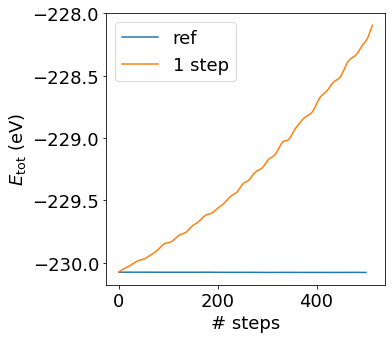

In [71]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(1,1)
for etot,l in zip([etotal_ref, e_ase_1step_MD_etot], ['ref', '1 step']):
    ax.plot(etot, label = l)
ax.legend()
ax.set_xlabel(r'# steps')
ax.set_ylabel(r'$E_{\rm{tot}}$ (eV)')
# plt.savefig('/home/misa/projects/APDFT-CPMD/figures/nuclei_md/one_stepMD.png', bbox_inches='tight')

1 step MD has way stronger drift because error cancelling in velocity verlet algorithm needs information about the previous step

discuss code, name problems

#### E_tot

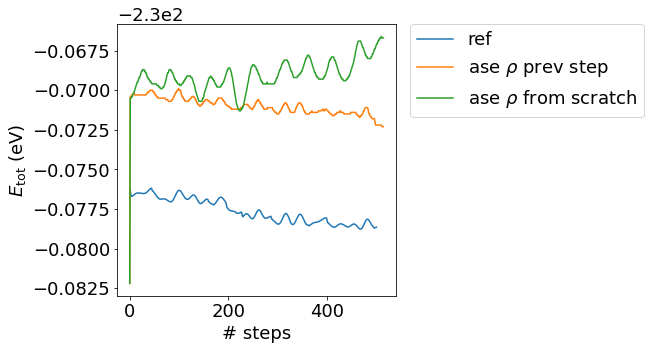

In [68]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 18.0
fig, ax = plt.subplots(1,1)
for etot,l in zip([etotal_ref, e_ase[:,1], e_ase_no_dens[:,1]], labels):
    ax.plot(etot, label = l)
ax.set_ylabel(r'$E_{\rm{tot}}$ (eV)')
ax.set_xlabel('# steps')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.0)
# plt.savefig('/home/misa/projects/APDFT-CPMD/figures/nuclei_md/etot_comparison.png', bbox_inches='tight')

#### E_pot

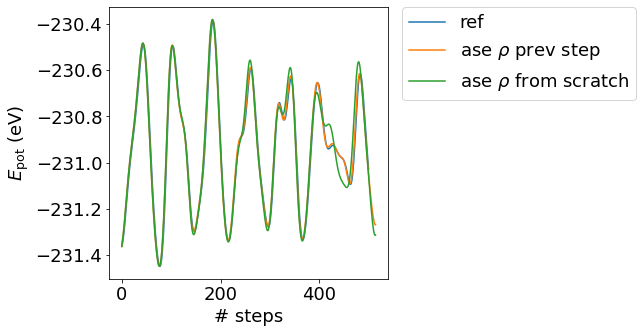

In [69]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 18.0
fig, ax = plt.subplots(1,1)
for etot,l in zip([epot_ref, e_ase[:,2], e_ase_no_dens[:,2]], labels):
    ax.plot(etot, label = l)
ax.set_ylabel(r'$E_{\rm{pot}}$ (eV)')
ax.set_xlabel('# steps')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.0)
# plt.savefig('/home/misa/projects/APDFT-CPMD/figures/nuclei_md/epot_comparison.png', bbox_inches='tight')

#### E_kin

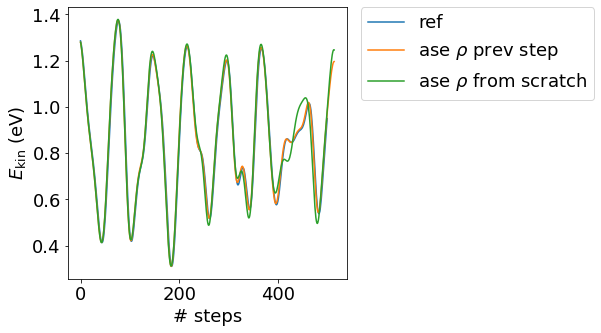

In [70]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 18.0
fig, ax = plt.subplots(1,1)
for etot,l in zip([ekin_ref, e_ase[:,3], e_ase_no_dens[:,3]], labels):
    ax.plot(etot, label = l)
ax.set_ylabel(r'$E_{\rm{kin}}$ (eV)')
ax.set_xlabel('# steps')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.0)
# plt.savefig('/home/misa/projects/APDFT-CPMD/figures/nuclei_md/ekin_comparison.png', bbox_inches='tight')

In [ ]:
# why is there a shift in the beginning
# run for 2000 steps

# figure out how to get the correct potential energy for every MD step
# compare abinitio start from previous density and from scratch (make sure that indeed start from previous)
# plot energy, e_pot, e_kin for many steps
# make sure that there are no bugs in parsing of files
# explain why1 worse because no cancelling

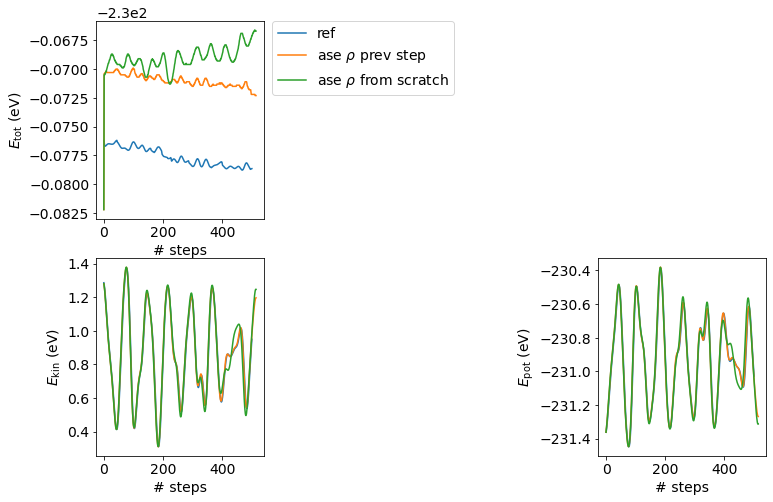

In [60]:
plt.rcParams['figure.figsize'] = [16.5,8]
plt.rcParams['font.size'] = 14.0

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, 0:1], )
ax2 = plt.subplot(gs[1, 0:1])
ax3 = plt.subplot(gs[1, 2:3])

# fig, ax = plt.subplots(2,2)
for etot,l in zip([etotal_ref, e_ase[:,1], e_ase_no_dens[:,1]], labels):
    ax1.plot(etot, label = l)
    ax1.set_ylabel(r'$E_{\rm{tot}}$ (eV)')
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.0)
for ekin,l in zip([ekin_ref, e_ase[:,3], e_ase_no_dens[:,3]], labels):
    ax2.plot(ekin,label = l)
    ax2.set_ylabel(r'$E_{\rm{kin}}$ (eV)')
for epot,l in zip([epot_ref, e_ase[:,2], e_ase_no_dens[:,2]], labels):
    ax3.plot(epot,label = l)
    ax3.set_ylabel(r'$E_{\rm{pot}}$ (eV)')
#     ax[1,0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.0)
    
for i in [ax1, ax2, ax3]:
    i.set_xlabel('# steps')

#### compare positions

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import profess_io as pio
from ase import units

In [ ]:
# monitor change of profess structures

def get_coord_atom(structure_array, num_atom, name_coord):
    coord = []
    for s in structure_array:
        coord.append(s[num_atom][name_coord])
    return(coord)

structure_array = []
for pf in range(1, 21):
    structure_array.append(pio.parse_ion_file(f'/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/ion_step{pf}.dat'))

In [ ]:
num_atom = 3
num_coord = 2
positions_ase = get_coord_atom(save_pos, num_atom, num_coord)
positions_profess = get_coord_atom(structure_array, num_atom, num_coord)
step = np.arange(1, 21)
fig, ax = plt.subplots(1,1)
plt.rcParams['font.size'] = 20
ax.plot(step, positions_ase[:-1], '-o', label = 'ase')
ax.plot(step[1::2], np.array(positions_profess)[1::2]*3.97, '-o', label = 'profess')
# ax.plot(step[1:], np.array(positions_profess)[1:]*3.97, '-o', label = 'profess')


ax.set_xlabel(r'step $n$')
ax.set_ylabel(r'$R_{I, i}$ (Ang)')
ax.legend()

#### compare velocities

In [ ]:
# velocities from Bohr/aut (PROFESS) -> Ang/ (Ang sqrt(aum/eV)) (ASE)
# Bohr -> Ang = length_in_Bohr*units.Bohr
# aut -> Ang sqrt(aum/eV)
aut2fs = 2.41888433e-2 # go from aut -> fs
aut2aset = aut2fs*units.fs # from aut -> aset (ase time unit)
au_vel2ase_vel = units.Bohr/aut2aset # conversion of velocities in a.u. to native ase units

# get velocities from profess
vel_array = []
for pf in range(1, 21):
    vel_array.append(pio.parse_velocity_file(f'/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/vel_step{pf}.dat'))

num_atom = 0
num_coord = 0
velocities_ase = get_coord_atom(np.array(save_vel)/au_vel2ase_vel, num_atom, num_coord)
velocities_profess = get_coord_atom(vel_array, num_atom, num_coord)

step = np.arange(1, 21)

plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)

ax.plot(step, velocities_ase[:-1], '-o', label = 'ase')
ax.plot(step, velocities_profess, '-o', label = 'profess')

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlabel(r'step $n$')
ax.set_ylabel(r'$v_{I,i}$ (a.u.)')
ax.legend()

files for ofdft:
- job.inpt (stays the same during CPMD)
- job.ion (structure: update position, lattice vectors?)
- density (update from CPMD)
- al.lda.recpot (pseudopotentials: stay the same during CPMD)

Which code to do APDFT calculations? (must support crystal structures)
Are local ofdft pseudopotentials compatible with other non-local pseudopotentials?

How to do MD runs in OFDFT for comparison?

How to run NVE, What is NVT coupled with Nose-Hoover?
Why are the positions negative, so close togethcer and different from initial structure?



- get forces, velocities from ofdft during python runtime
- propagate nuclei


            